In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


### Loading the Dataset

In this step, we load the dataset from a CSV file into a pandas DataFrame. This allows us to easily explore and manipulate the data for further analysis. We then display the first few rows to get an overview of the data structure and contents.

In [2]:
df = pd.read_csv("data/data.csv") 
df.head() # Display the first 5 rows 

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [3]:
df.info() # Display the data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

### Data Type Conversion

In [4]:
# Convert object columns to numeric
columns_to_convert = [
    'equipment_energy_consumption', 
    'lighting_energy', 
    'zone1_temperature', 
    'zone1_humidity', 
    'zone2_temperature'
]

# Using pandas to convert columns to numeric, coercing errors to NaN
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Display the updated DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  15945 non-null  float64       
 2   lighting_energy               15993 non-null  float64       
 3   zone1_temperature             15908 non-null  float64       
 4   zone1_humidity                15969 non-null  float64       
 5   zone2_temperature             15934 non-null  float64       
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

In [5]:
df.describe() # Display summary statistics for numerical columns

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,16857,15945.000000,15993.000000,15908.000000,15969.000000,15934.000000,15990.000000,16055.000000,15979.000000,16041.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,2016-03-10 02:16:38.647446272,95.810413,3.938101,21.249414,39.046066,19.793113,39.494553,21.665733,38.201314,20.239922,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
min,2016-01-11 17:00:00,-1139.985693,-86.002966,8.726818,-46.660000,2.988199,-77.265503,6.543921,-71.406273,4.613485,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,2016-02-09 21:20:00,50.000000,0.000000,20.500000,37.026667,18.600000,37.757500,20.533333,36.592500,19.266667,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,2016-03-10 00:10:00,60.000000,0.000000,21.323333,39.226667,19.600000,40.293333,21.767500,38.400000,20.290000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,2016-04-08 03:40:00,100.000000,0.000000,22.100000,42.500000,20.790000,43.000000,22.760000,41.433333,21.356667,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,2016-12-01 15:50:00,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617
std,NaN,182.753554,14.580575,2.165618,9.952521,2.943771,10.129513,2.594309,10.144388,2.783050,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631


In [6]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")

# Optionally, display the duplicate rows
if duplicate_count > 0:
    print("Duplicate rows:")
    print(df[df.duplicated()])

Number of duplicate rows: 68
Duplicate rows:
                timestamp  equipment_energy_consumption  lighting_energy  \
382   2016-01-14 08:40:00                         360.0              0.0   
476   2016-01-15 00:10:00                          60.0              0.0   
563   2016-01-15 14:20:00                          60.0              0.0   
775   2016-01-17 01:30:00                          50.0              0.0   
1536  2016-01-22 08:00:00                          40.0             10.0   
...                   ...                           ...              ...   
15874 2016-04-30 11:50:00                          80.0              0.0   
16480 2016-05-04 16:10:00                          90.0              0.0   
16687 2016-05-06 02:30:00                          60.0              0.0   
16777 2016-05-06 17:20:00                         100.0              0.0   
16791 2016-05-06 19:30:00                         140.0              0.0   

       zone1_temperature  zone1_humidity  

In [8]:
columns = df.columns
columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')

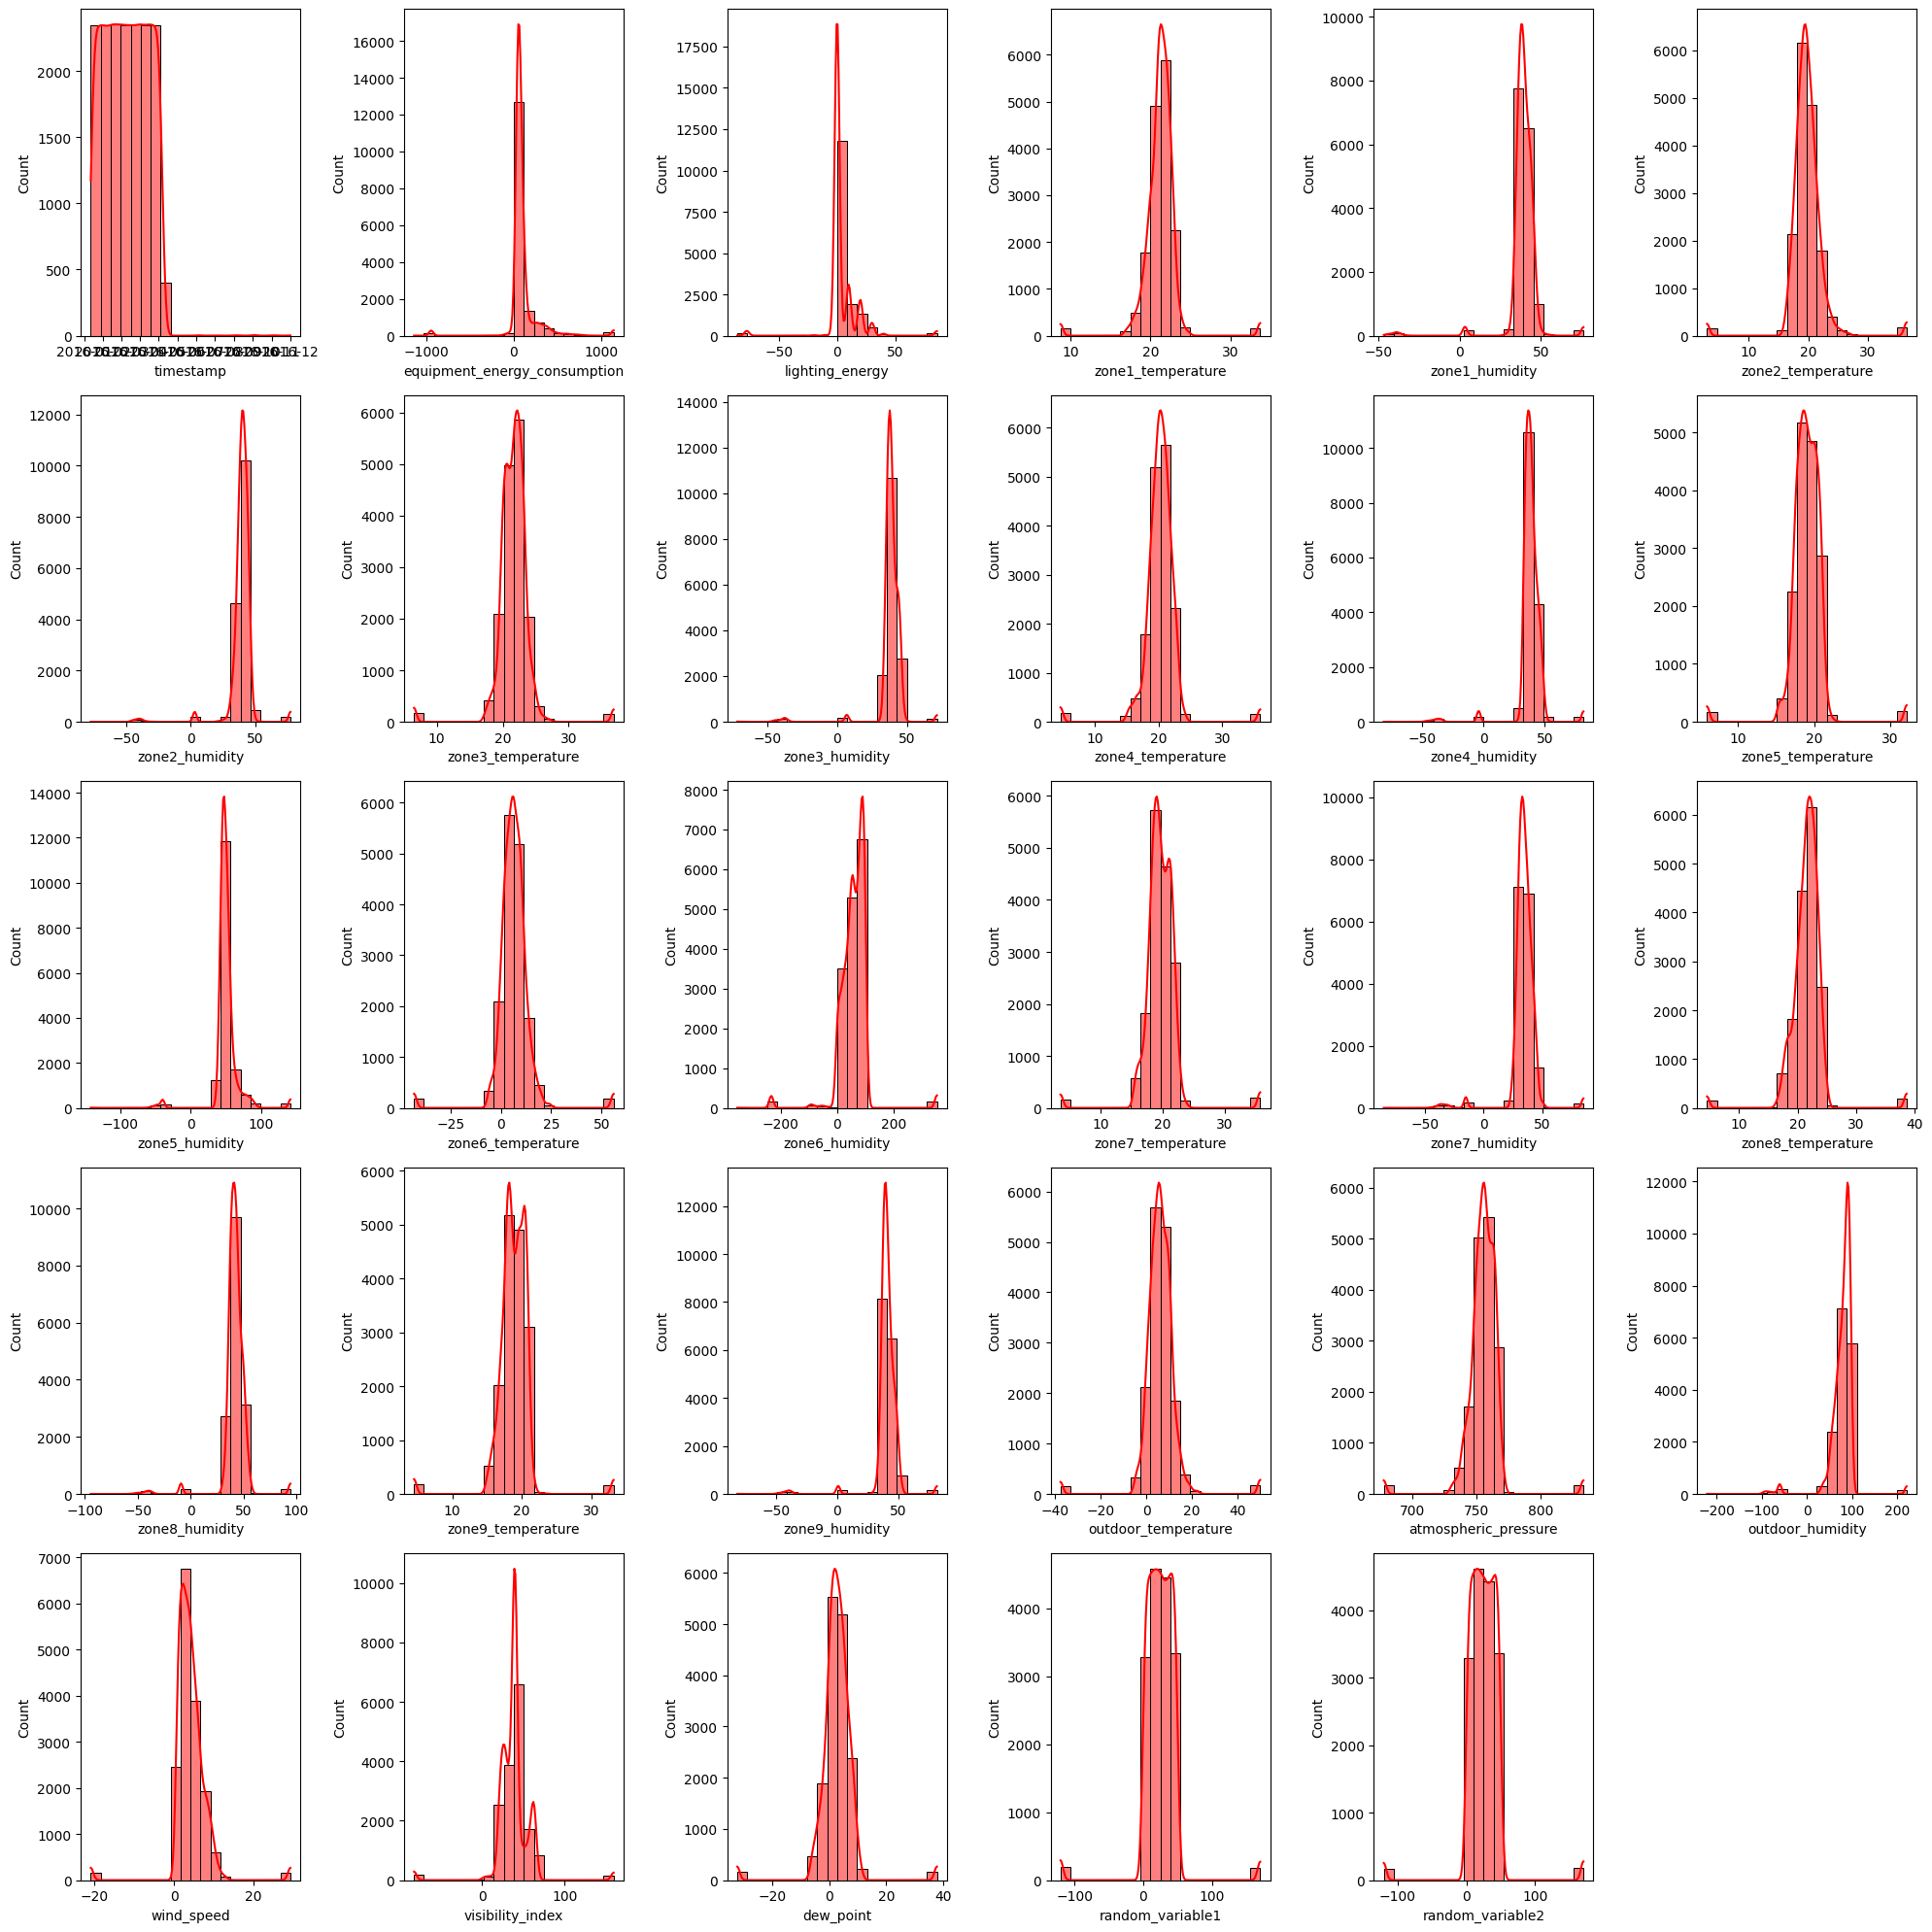

In [9]:
plt.figure(figsize=(20,20))
pt=1

for column in columns:
    ax= plt.subplot(5,6,pt)
    sns.histplot(df[column],bins=20,ax=ax, kde= True, color='red')
    ax.set_xlabel(column)
    pt+=1
plt.tight_layout()
plt.show()

In [10]:
# distribution of each numeric column
normality_results={}

for column in columns:
    clean_data= df[column].dropna()
    shapiro_test, p_value= shapiro(clean_data)
    normality_results[col]= p_value
    print(f"{column}: sw={shapiro_test}, p-value={p_value}")

timestamp: sw=0.953594554932914, p-value=1.0750745528271619e-57
equipment_energy_consumption: sw=0.5083394878250663, p-value=1.2403693942277996e-109
lighting_energy: sw=0.5019052676677773, p-value=4.689257172776367e-110
zone1_temperature: sw=0.6928136833445637, p-value=1.3119723092553788e-97
zone1_humidity: sw=0.4957808351415439, p-value=2.4606752480040433e-110
zone2_temperature: sw=0.6887634446598859, p-value=5.661651637937276e-98
zone2_humidity: sw=0.5066507983884005, p-value=8.457916219789056e-110
zone3_temperature: sw=0.7015994910687235, p-value=3.992198859611395e-97
zone3_humidity: sw=0.43862692105054946, p-value=3.421069590262553e-113
zone4_temperature: sw=0.690137261904511, p-value=4.929423103316542e-98
zone4_humidity: sw=0.5560020288812677, p-value=3.378651876591702e-107
zone5_temperature: sw=0.6920167401377377, p-value=7.551165227732498e-98
zone5_humidity: sw=0.5924513769867481, p-value=5.864126357957874e-105
zone6_temperature: sw=0.6909657982537438, p-value=6.450639679956665e

In [11]:
df.isnull().sum().sort_values(ascending=False)

zone1_temperature               949
zone2_temperature               923
equipment_energy_consumption    912
zone1_humidity                  888
zone9_humidity                  888
zone3_humidity                  878
zone2_humidity                  867
lighting_energy                 864
zone6_temperature               848
zone8_temperature               848
zone6_humidity                  847
atmospheric_pressure            842
zone5_temperature               838
wind_speed                      828
dew_point                       826
random_variable1                826
random_variable2                824
zone4_temperature               816
visibility_index                815
outdoor_temperature             806
zone7_humidity                  805
zone3_temperature               802
zone5_humidity                  801
outdoor_humidity                799
zone7_temperature               794
zone4_humidity                  781
zone8_humidity                  777
zone9_temperature           

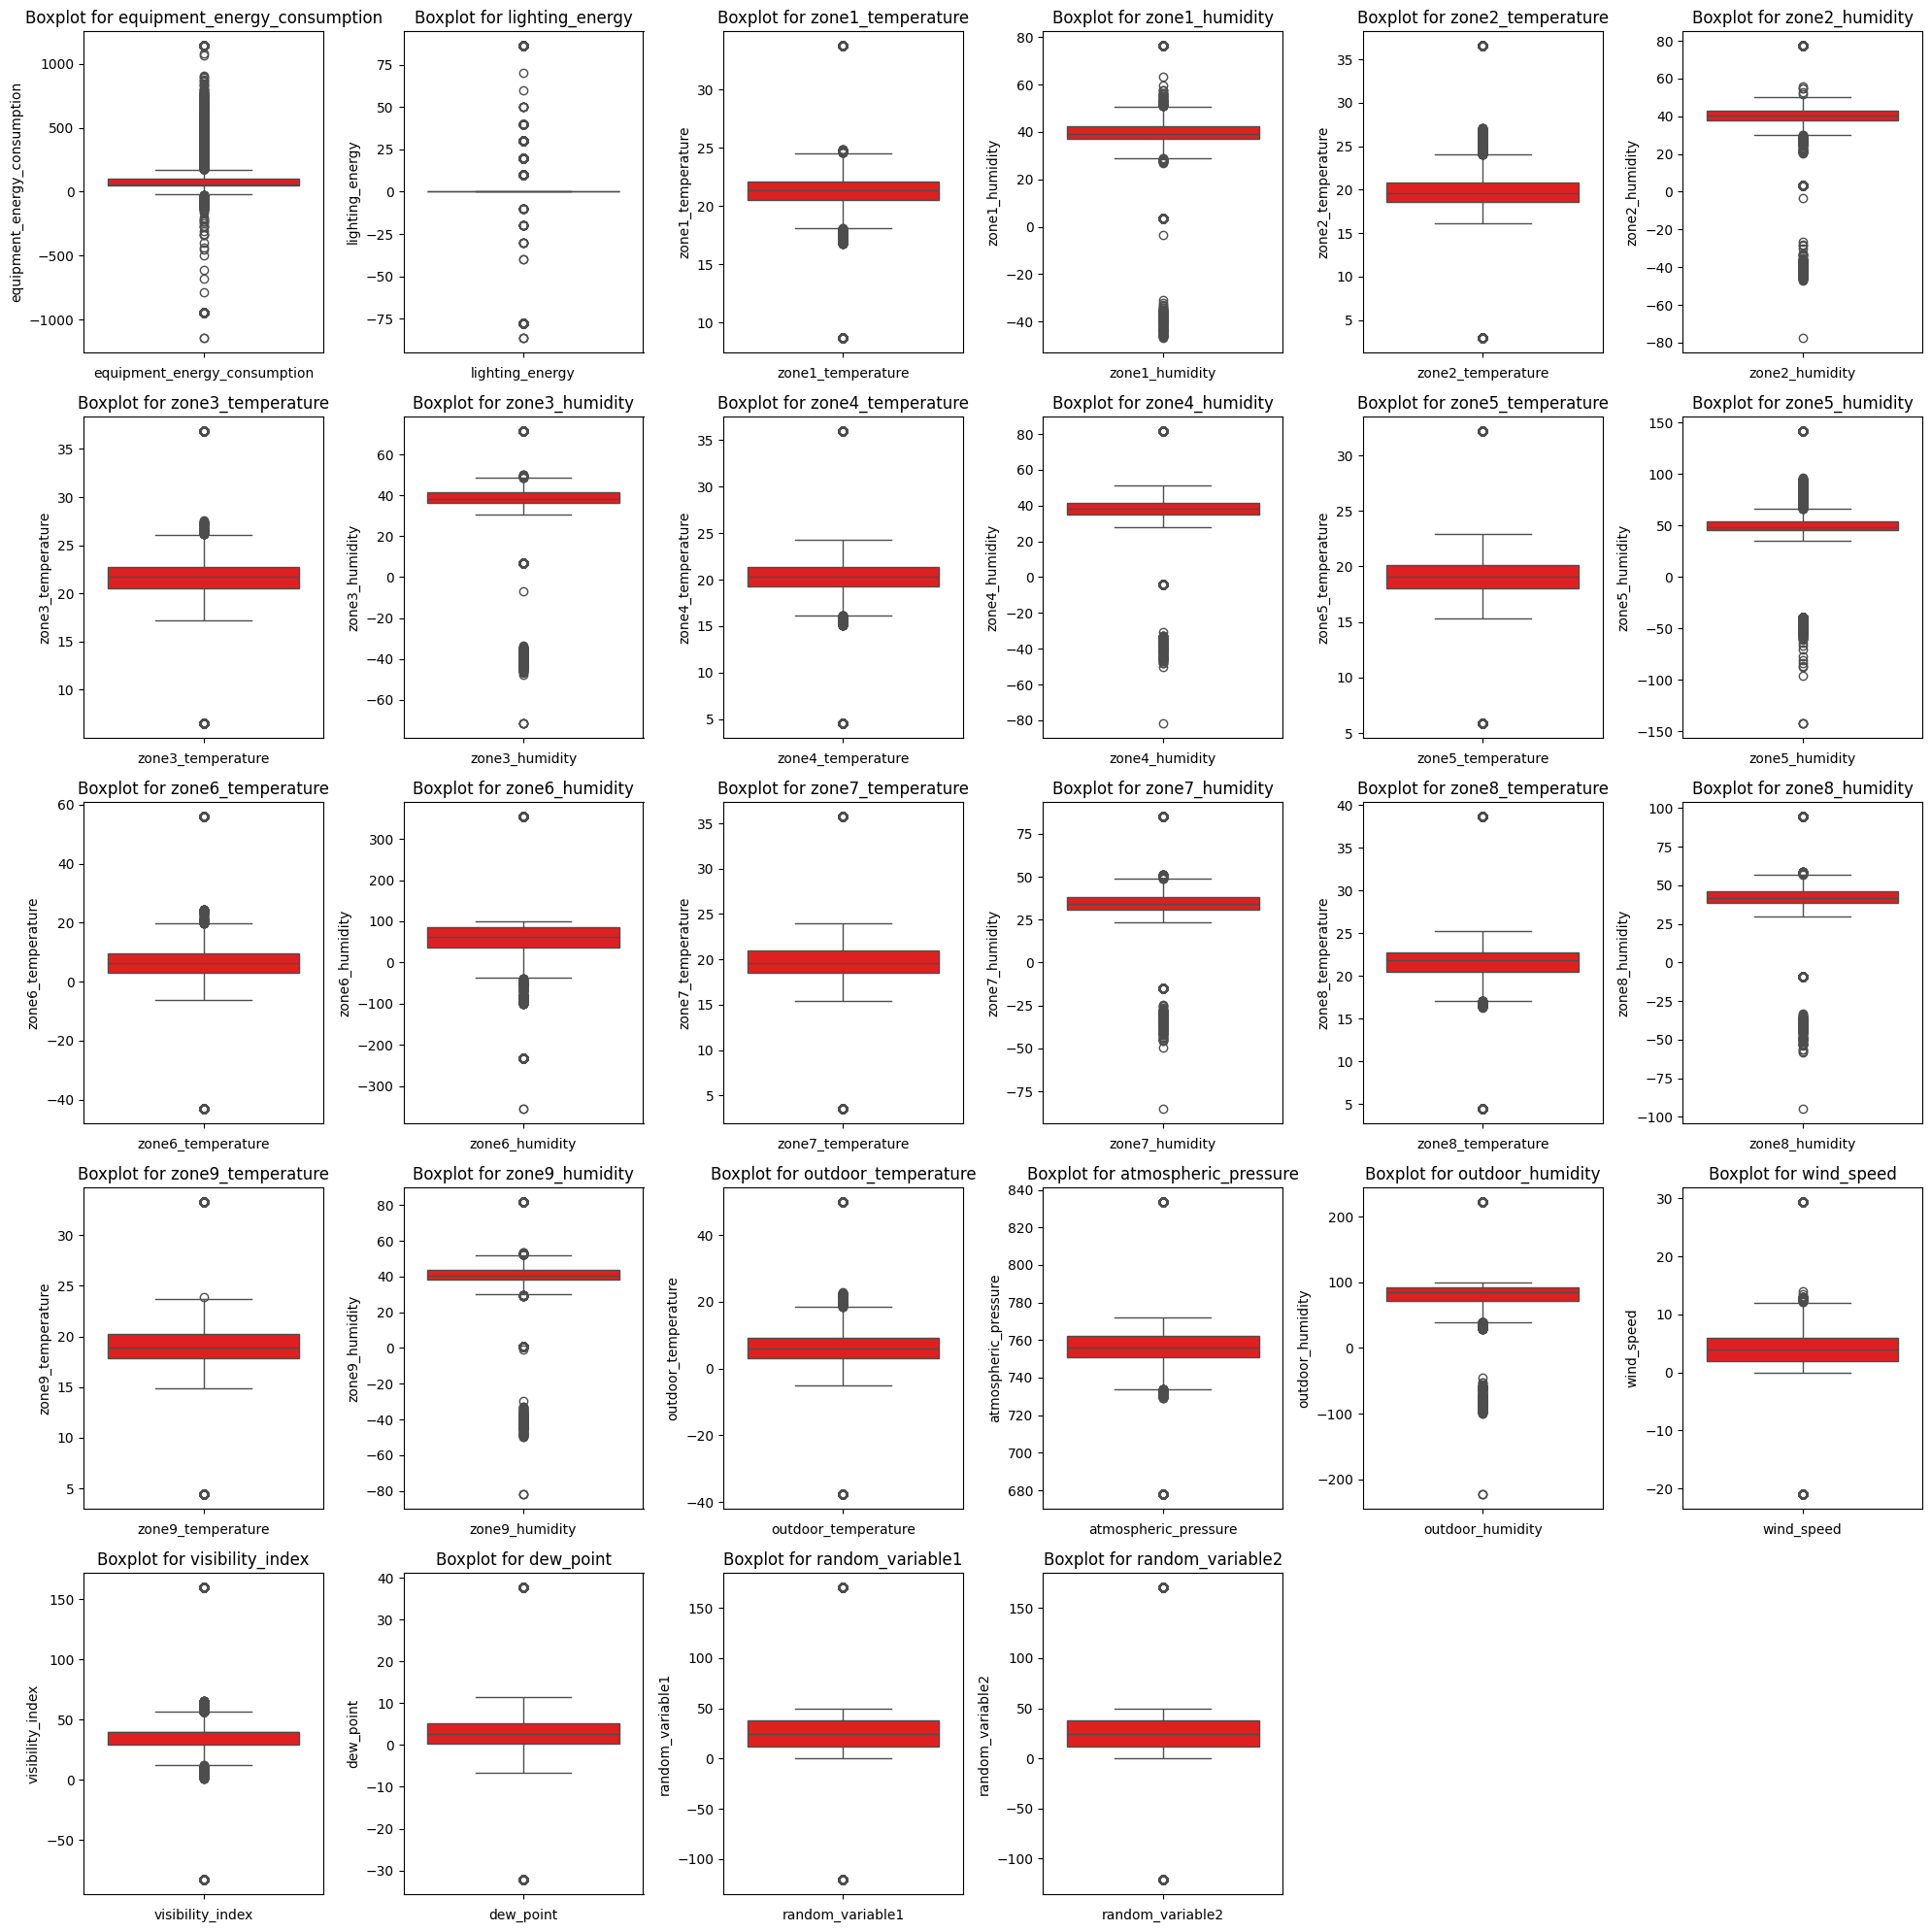

In [12]:
plt.figure(figsize=(20, 20))
pt = 1

for column in columns:
    if column != 'timestamp' :
        ax = plt.subplot(5, 6, pt)
        sns.boxplot(df[column], ax=ax, color='red')  # Boxplot for outliers
        ax.set_xlabel(column)
        ax.set_title(f'Boxplot for {column}')
        pt += 1

plt.tight_layout()
plt.show()

In [13]:
# Extract time-based features
df['hour_of_day'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['month'] = df['timestamp'].dt.month_name()

# Season mapping function
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['timestamp'].dt.month.apply(get_season)

# Shift mapping function
def get_shift(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['shift'] = df['hour_of_day'].apply(get_shift)


📊 1. Average Energy Consumption by Hour of Day

<Axes: title={'center': 'Avg Equipment Energy Consumption by Hour'}, xlabel='Hour', ylabel='Energy (kWh)'>

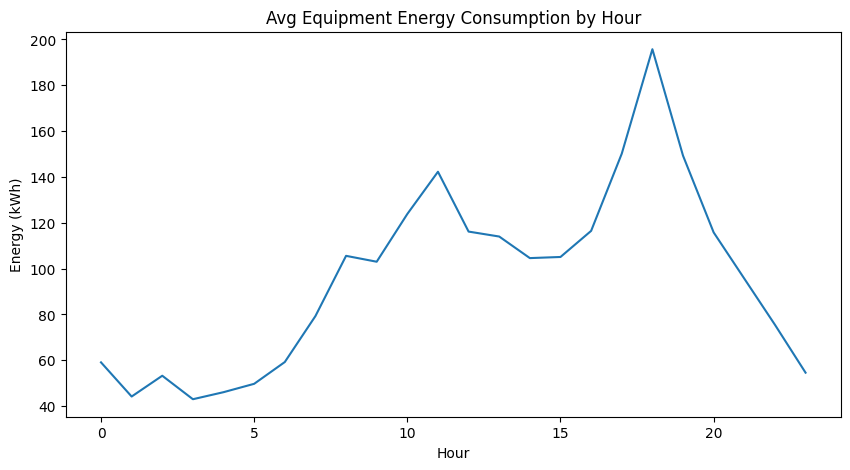

In [14]:
hourly_energy = df.groupby('hour_of_day')['equipment_energy_consumption'].mean()

hourly_energy.plot(kind='line', title='Avg Equipment Energy Consumption by Hour', xlabel='Hour', ylabel='Energy (kWh)', figsize=(10,5))

🌞 2. Energy Consumption by Shift

<Axes: title={'center': 'Avg Energy Consumption by Shift'}, xlabel='shift', ylabel='Energy (kWh)'>

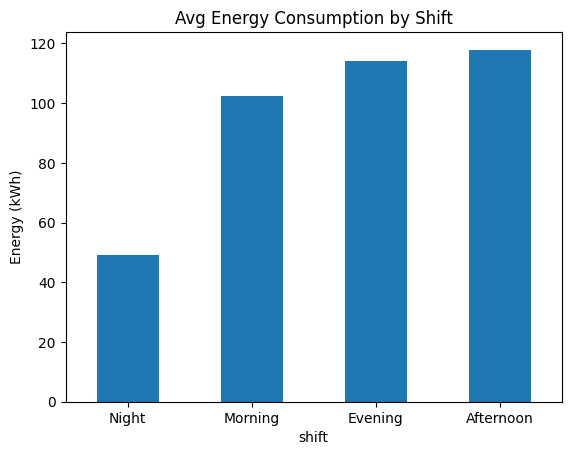

In [15]:
shift_energy = df.groupby('shift')['equipment_energy_consumption'].mean().sort_values()

shift_energy.plot(kind='bar', title='Avg Energy Consumption by Shift', ylabel='Energy (kWh)', rot=0)


📅 3. Energy Consumption by Day of Week

<Axes: title={'center': 'Avg Energy Consumption by Day of Week'}, xlabel='day_of_week', ylabel='Energy (kWh)'>

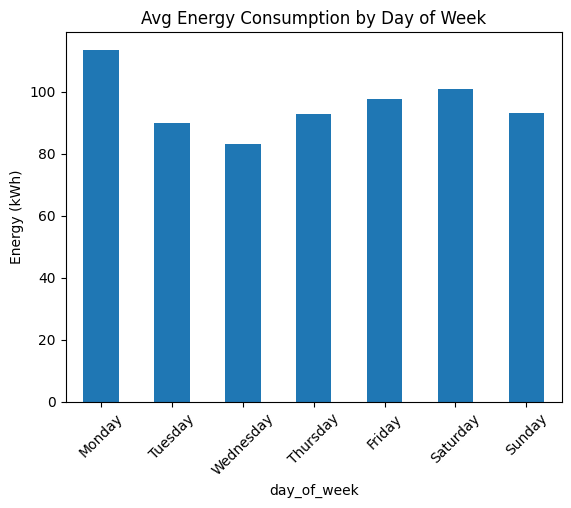

In [16]:
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_energy = df.groupby('day_of_week')['equipment_energy_consumption'].mean().reindex(dow_order)

day_energy.plot(kind='bar', title='Avg Energy Consumption by Day of Week', ylabel='Energy (kWh)', rot=45)


🌦️ 4. Energy Consumption by Season

<Axes: title={'center': 'Avg Energy Consumption by Season'}, xlabel='season', ylabel='Energy (kWh)'>

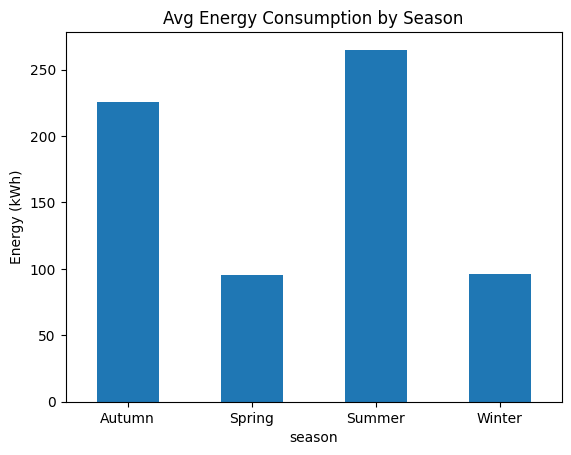

In [17]:
season_energy = df.groupby('season')['equipment_energy_consumption'].mean()

season_energy.plot(kind='bar', title='Avg Energy Consumption by Season', ylabel='Energy (kWh)', rot=0)


In [18]:
season_energy

season
Autumn    225.712242
Spring     95.269526
Summer    265.000000
Winter     96.364250
Name: equipment_energy_consumption, dtype: float64

### Preprocessing

In [19]:
# Step 1: Identify numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Step 2: Replace negative values with NaN (sensor errors or invalid)
df[numeric_cols] = df[numeric_cols].applymap(lambda x: x if x >= 0 else np.nan)

# Step 3: Impute missing values with median (good for non-normal/skewed distributions)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Step 4: Confirm no missing or negative values remain
assert (df[numeric_cols] < 0).sum().sum() == 0, "There are still negative values!"
assert df[numeric_cols].isnull().sum().sum() == 0, "There are still nulls!"


In [20]:
df.isnull().sum()

timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
hour_of_day   

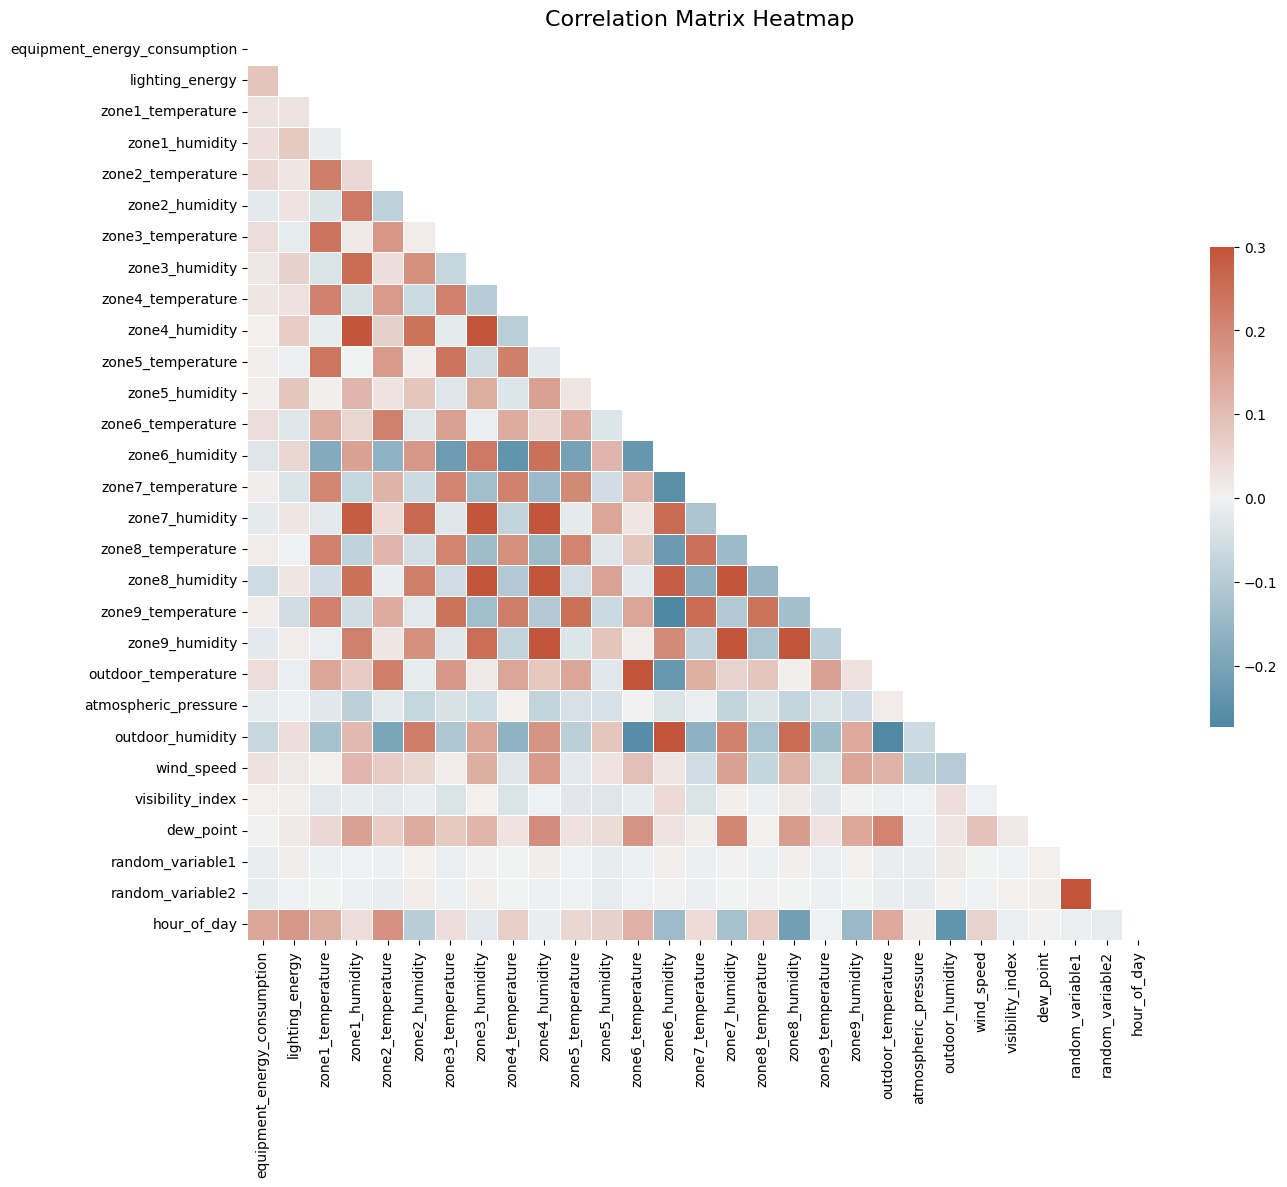

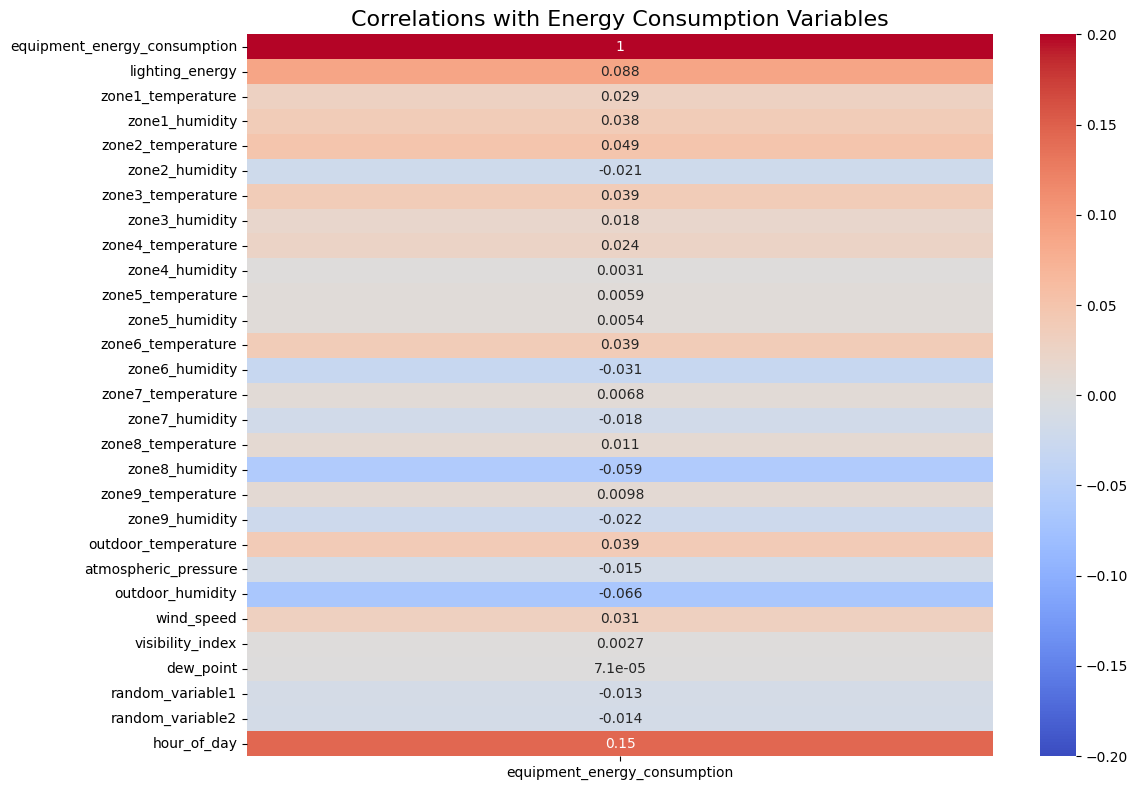

In [21]:
  # Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, annot=False, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

# Focus on energy consumption correlations
energy_corr = corr_matrix[['equipment_energy_consumption']]

plt.figure(figsize=(12, 8))
sns.heatmap(energy_corr, annot=True, cmap='coolwarm', vmin=-0.2, vmax=0.2)
plt.title('Correlations with Energy Consumption Variables', fontsize=16)
plt.tight_layout()
plt.savefig('energy_correlations.png')

In [23]:
df.isnull().sum()

timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
hour_of_day   

In [24]:
df.shape

(16857, 34)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16857 non-null  float64       
 2   lighting_energy               16857 non-null  float64       
 3   zone1_temperature             16857 non-null  float64       
 4   zone1_humidity                16857 non-null  float64       
 5   zone2_temperature             16857 non-null  float64       
 6   zone2_humidity                16857 non-null  float64       
 7   zone3_temperature             16857 non-null  float64       
 8   zone3_humidity                16857 non-null  float64       
 9   zone4_temperature             16857 non-null  float64       
 10  zone4_humidity                16857 non-null  float64       
 11  zone5_temperature           

In [29]:
# Converting categorical columns to numerical using Label Encoding
label_cols = ['day_of_week', 'month', 'season', 'shift']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [30]:
df.describe()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour_of_day,day_of_week,month,season,shift
count,16857,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,...,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000
mean,2016-03-10 02:16:38.647446272,105.051173,4.618170,21.253576,39.769547,19.782540,40.226446,21.670575,39.082150,20.242346,...,4.436293,39.852502,4.249139,26.505942,26.483183,11.506733,3.017322,3.415436,1.845228,1.500860
min,2016-01-11 17:00:00,10.000000,0.000000,8.726818,3.348060,2.988199,3.193842,6.543921,6.902515,4.613485,...,0.000000,1.000000,0.000000,0.005322,0.005322,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-02-09 21:20:00,50.000000,0.000000,20.600000,37.200000,18.666667,38.060000,20.600000,36.863333,19.292500,...,2.166667,30.000000,2.366667,13.332727,13.245990,5.000000,1.000000,0.000000,1.000000,1.000000
50%,2016-03-10 00:10:00,60.000000,0.000000,21.323333,39.290000,19.600000,40.363333,21.767500,38.400000,20.290000,...,4.000000,40.000000,3.700000,25.126117,25.088833,12.000000,3.000000,3.000000,1.000000,1.000000
75%,2016-04-08 03:40:00,90.000000,0.000000,22.100000,42.296667,20.700000,42.790000,22.700000,41.000000,21.290000,...,5.666667,40.000000,5.150000,37.242702,37.277176,18.000000,5.000000,6.000000,3.000000,3.000000
max,2016-12-01 15:50:00,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,...,29.318719,159.606156,37.673716,170.156325,170.329617,23.000000,6.000000,10.000000,3.000000,3.000000
std,NaN,143.676732,11.365315,2.103842,6.121657,2.862376,6.516192,2.531931,5.322892,2.714872,...,3.479314,16.528048,4.041497,20.340881,20.382886,6.933696,2.014231,2.362419,0.988520,1.117828


In [33]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour_of_day,day_of_week,month,season,shift
0,2016-01-11 17:00:00,60.0,0.0,33.746609,47.596667,19.2,44.790000,19.79,38.400000,19.000000,...,7.000000,63.000000,5.300000,13.275433,13.275433,17,1,4,3,0
1,2016-01-11 17:10:00,60.0,30.0,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.666667,59.166667,5.200000,18.606195,18.606195,17,1,4,3,0
2,2016-01-11 17:20:00,50.0,30.0,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,6.333333,55.333333,5.100000,28.642668,28.642668,17,1,4,3,0
3,2016-01-11 17:30:00,50.0,40.0,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.290000,...,6.000000,51.500000,37.673716,45.410389,45.410389,17,1,4,3,0
4,2016-01-11 17:40:00,60.0,40.0,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,5.666667,47.666667,4.900000,10.084097,10.084097,17,1,4,3,0


In [ ]:
# saving the preprocessed data
df.to_csv('preprocessed_data.csv', index=False)
